# INTRODUCTION

## We'll learn, practice and compare 4 classification models in this project. So, you'll see in this kernel:

### 1.Test-Train Datas Split

### 2. Desicion Tree Classification

### 3. Logistic Regression Classification

### 4.Random Forest Classification 

### 5.Support Vector Machine (SVM) Classification

### 6.Compare all of these Classification Models

# Deceptive Opinion Spam Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv("deceptive-opinion_01.csv")

In [3]:
df.head()

,deceptive,hotel,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,truthful,conrad,NaN,NaN,NaN
1,truthful,hyatt,NaN,NaN,NaN
2,truthful,hyatt,NaN,NaN,NaN
3,truthful,omni,NaN,NaN,NaN
4,truthful,hyatt,NaN,NaN,NaN


In [4]:
df['deceptive'].value_counts()

deceptive    1600
truthful     1600
Name: deceptive, dtype: int64

In [5]:
placed_no = [ 800 , 800 ]

In [6]:
stat = ['Deceptive' , 'Truthful']

In [7]:
colors = [ 'brown' , 'orange' ]

([<matplotlib.patches.Wedge at 0x1871826b100>,
 [Text(6.735557395310444e-17, 1.1, 'Deceptive'),
  Text(-2.0206672185931328e-16, -1.1, 'Truthful')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

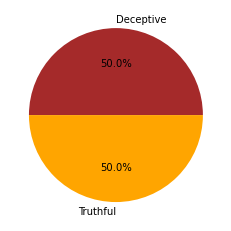

In [8]:
plt.pie(placed_no , labels = stat , colors=colors , autopct= '%0.1f%%')

In [9]:
Hotel = df['hotel'].unique()

In [10]:
Hotel

array(['conrad', 'hyatt', 'omni', 'fairmont', 'sheraton', 'knickerbocker',
       'homewood', 'swissotel', 'ambassador', 'affinia', 'hardrock',
       'talbott', 'hilton', 'james', 'monaco', 'sofitel', 'palmer',
       'intercontinental', 'allegro', 'amalfi'], dtype=object)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   deceptive   3200 non-null   object 
 1   hotel       3200 non-null   object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 125.1+ KB


## Finding NaN Values

In [12]:
df.isnull().sum()

deceptive        0
hotel            0
Unnamed: 2    3200
Unnamed: 3    3200
Unnamed: 4    3200
dtype: int64

## Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le_hotel = LabelEncoder()

In [15]:
le_deceptive = LabelEncoder()

In [16]:
le_hotel

LabelEncoder()

In [17]:
le_deceptive

LabelEncoder()

## Input

In [18]:
X = df[['hotel']]

In [19]:
X.head()

,hotel
0,conrad
1,hyatt
2,hyatt
3,omni
4,hyatt


## Fitting

In [20]:
#X = le_hotel.fit_transform(df['hotel'])

In [21]:
#X

## Hotel Equivalent

In [22]:
#df1 = pd.DataFrame()

In [23]:
#df1['hotel_df'] = df['hotel']

In [24]:
#df1['hotel_X'] = X

In [25]:
#df1.head()

## Output/Target

In [26]:
y = df[['deceptive']]

In [27]:
y.head()

,deceptive
0,truthful
1,truthful
2,truthful
3,truthful
4,truthful


In [28]:
y['deceptive'] = le_deceptive.fit_transform(y['deceptive'])

<ipython-input-28-1446a5b09a0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['deceptive'] = le_deceptive.fit_transform(y['deceptive'])


In [29]:
y.head()                         # Here 1 denotes Truthful

,deceptive
0,1
1,1
2,1
3,1
4,1


In [30]:
y.tail()                         # Here 0 denotes Deceptive

,deceptive
3195,0
3196,0
3197,0
3198,0
3199,0


## Splitting the data into Training and Testing sets

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
algo_scores=[]
algo_names=[]

In [33]:
X_train , X_test , y_train , y_test   = train_test_split(X,y,test_size=0.2)

In [34]:
len(X_train)

2560

In [35]:
len(y_train)

2560

In [36]:
len(X_test)

640

In [37]:
len(y_test)

640

In [38]:
X_test.shape

(640, 1)

In [39]:
y_test.shape

(640, 1)

In [40]:
X_test.head()

,hotel
1941,amalfi
1366,ambassador
677,monaco
2085,sheraton
2148,homewood


In [41]:
X_test.tail()

,hotel
229,ambassador
917,homewood
2906,swissotel
1803,ambassador
339,allegro


In [42]:
y_test.head()

,deceptive
1941,1
1366,0
677,0
2085,0
2148,0


In [43]:
y_test.tail()

,deceptive
229,1
917,1
2906,0
1803,1
339,1


## Model Training

### Decision Tree

In [44]:
from sklearn import tree

In [45]:
model1 = tree.DecisionTreeClassifier()

In [46]:
model1.fit(X,y)

ValueError: could not convert string to float: 'conrad'

In [ ]:
algo_names.append("Decision Tree")
algo_scores.append(model1.score(X_test,y_test))

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model2 = LogisticRegression()

In [ ]:
model2.fit(X,y)

In [ ]:
algo_names.append("Logistic Regression")
algo_scores.append(model2.score(X_test,y_test))

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model3 = RandomForestClassifier()

In [ ]:
model3.fit(X,y)

In [ ]:
algo_names.append("Random Forest")
algo_scores.append(model3.score(X_test,y_test))

### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model4=SVC()

In [ ]:
model4.fit(X,y)

In [ ]:
algo_names.append("SVM")
algo_scores.append(model4.score(X_test,y_test))

## Accuracy

In [ ]:
from sklearn import metrics

In [ ]:
model1.score(X,y)                                            

### Model 1 = Score of Decision Tree Model = 0.89625

In [ ]:
model2.score(X,y)

### Model 2 = Score of Logistic Regression Model = 0.7975

In [ ]:
model3.score(X,y)

### Model 3 = Score of Random Forest Model = 0.89625

In [ ]:
model4.score(X,y)

### Model 4 = Score of SVM Model = 0.7975

## Prediction

In [ ]:
p1=model1.predict(X_test)

In [ ]:
p2=model2.predict(X_test)

In [ ]:
p3=model3.predict(X_test)

In [ ]:
p4=model4.predict(X_test)

## Metrics

In [ ]:
metrics.accuracy_score(y_test,p1)

In [ ]:
metrics.accuracy_score(y_test,p2)

In [ ]:
metrics.accuracy_score(y_test,p3)

In [ ]:
metrics.accuracy_score(y_test,p4)

#### COMPARING THE CLASSIFICATION SCORE OF DIFFERENT ALGORITHMS USING BAR GRAPH

In [ ]:
plt.figure(figsize=(8,8))
plt.ylim([0,3])
plt.bar(algo_names,algo_scores,width=0.3,color= ['brown'])
plt.xlabel('Algorithm Name')
plt.ylabel('Algorithm Score')

## Individual Prediction Depiction of Models

### Decision Tree

In [ ]:
comp1=[32,573.6]                                                           #  (5% of X_test, score*X_test)
l1=['Wrong','Correct']
plt.pie(comp1,labels=l1,autopct='%0.1f%%',colors=['Brown','Orange'])
plt.title('DECISION TREE PREDICTIONS')
plt.show()

### Logistic Regression

In [ ]:
comp2=[64,510.4]                                                           #  (10% of X_test, score*X_test)
l2=['Wrong','Correct']
plt.pie(comp2,labels=l2,autopct='%0.1f%%',colors=['Brown','Orange'])
plt.title('LOGISTIC REGRESSION PREDICTIONS')
plt.show()

### Random Forest

In [ ]:
comp3=[44.8,573.6]                                                          #  (7% of X_test, score*X_test)
l3=['Wrong','Correct']
plt.pie(comp3,labels=l3,autopct='%0.1f%%',colors=['Brown','Orange'])
plt.title('RANDOM FOREST PREDICTIONS')
plt.show()

### SVM

In [ ]:
comp4=[83.2,510.4]                                                          #  (13% of X_test, score*X_test)
l4=['Wrong','Correct']
plt.pie(comp4,labels=l4,autopct='%0.1f%%',colors=['Brown','Orange'])
plt.title('SVM PREDICTIONS')
plt.show()

## Saving the 4 Models

In [ ]:
pickle.dump(model1, open('model1.pkl','wb'))
pickle.dump(model2, open('model2.pkl','wb'))
pickle.dump(model3, open('model3.pkl','wb'))
pickle.dump(model4, open('model4.pkl','wb'))

## Loading the 4 Models

In [ ]:
M1 = pickle.load(open('model1.pkl','rb'))

# Conclusion

### BASED ON PRECISION , PREDICTION PIE CHART , ACCURACY SCORE , WE CAN SAY THAT RANDOM FOREST CLASSIFICATION AND DECISION FOREST CLASSIFICATION IS BEST SUITED FOR THIS PROBLEM WHERE WE ARE PREDICTING WHETHER THE TEXTS TO VARIOUS HOTELS THROUGH VARIOUS SOURCES ARE DECEPTIVE OR TRUTHFUL.